In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [2]:
train_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

batch_size = 32
img_size = (128, 128)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    label_mode='categorical',
    interpolation='bilinear',
    follow_links=True,
    smart_resize=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical',
    interpolation='bilinear',
    follow_links=True,
    smart_resize=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    image_size=img_size,
    label_mode='categorical',
    interpolation='bilinear',
    follow_links=True,
    smart_resize=True
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Found 70295 files belonging to 38 classes.
Using 14059 files for validation.
Found 17572 files belonging to 38 classes.


In [3]:
class_names = train_ds.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

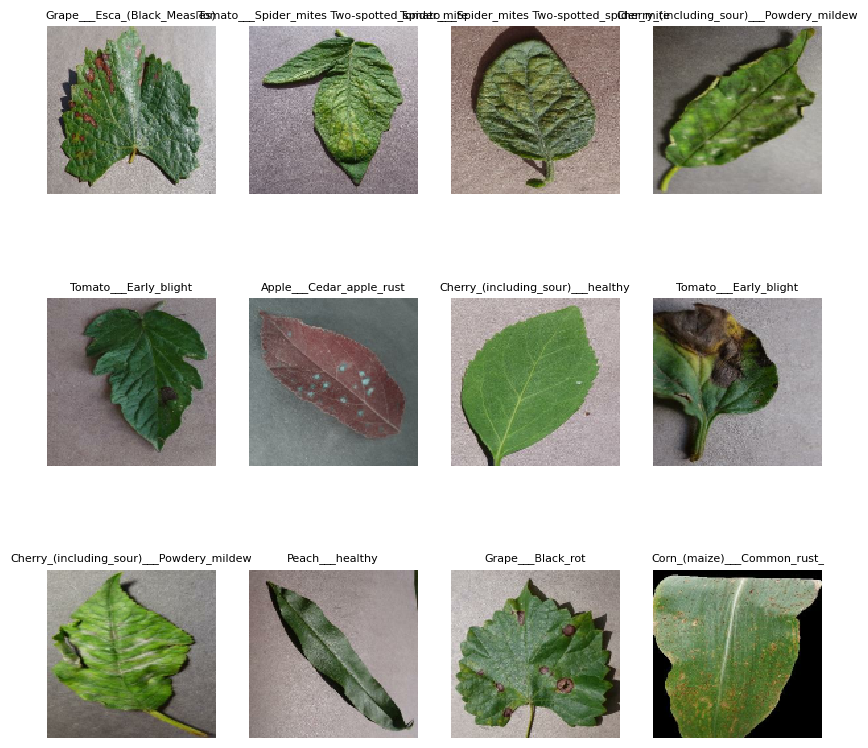

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"), cmap=plt.cm.binary, interpolation='nearest')
        plt.title(class_names[labels_batch[i].numpy().argmax()], fontsize=8)
        plt.axis("off")
plt.show()

In [5]:
len(train_ds)

1758

In [6]:
len(val_ds)

440

In [7]:
len(test_ds)

550

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 32


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(128, 128),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(train_generator,
                    epochs=50,
                    validation_data=val_generator,callbacks=[early_stop])

Epoch 1/50
1758/1758 [==============================] - 765s 430ms/step - loss: 2.1066 - accuracy: 0.3854 - val_loss: 1.5669 - val_accuracy: 0.5572
Epoch 2/50
1758/1758 [==============================] - 379s 215ms/step - loss: 0.9105 - accuracy: 0.7139 - val_loss: 0.6112 - val_accuracy: 0.8067
Epoch 3/50
1758/1758 [==============================] - 378s 215ms/step - loss: 0.6177 - accuracy: 0.8041 - val_loss: 0.7207 - val_accuracy: 0.7913
Epoch 4/50
1758/1758 [==============================] - 398s 226ms/step - loss: 0.4949 - accuracy: 0.8416 - val_loss: 0.5825 - val_accuracy: 0.8227
Epoch 5/50
1758/1758 [==============================] - 378s 215ms/step - loss: 0.4197 - accuracy: 0.8658 - val_loss: 0.4088 - val_accuracy: 0.8718
Epoch 6/50
1758/1758 [==============================] - 338s 192ms/step - loss: 0.3682 - accuracy: 0.8821 - val_loss: 0.3868 - val_accuracy: 0.8787
Epoch 7/50
1758/1758 [==============================] - 329s 187ms/step - loss: 0.3316 - accuracy: 0.8946 - val_

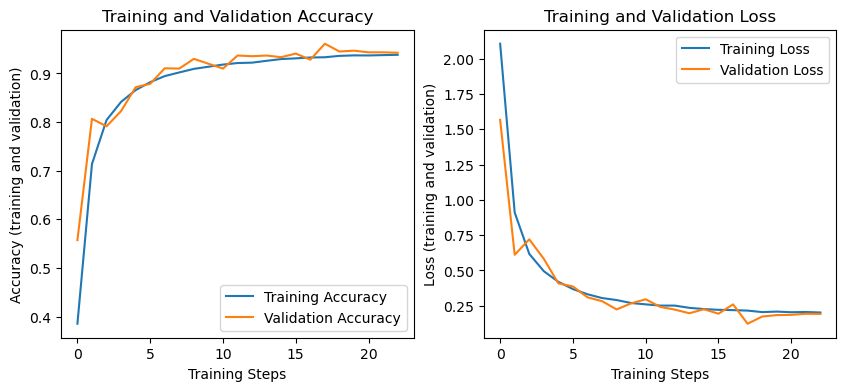

In [14]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(23)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

1/1 [==============================] - 0s 24ms/step
class: Strawberry___healthy, confidence: 1.000000


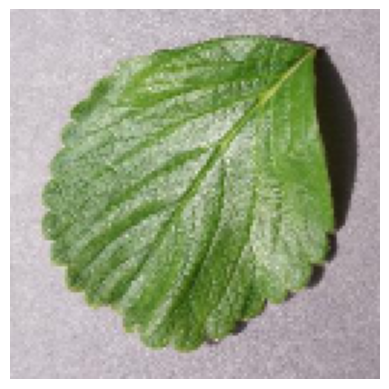

1/1 [==============================] - 0s 26ms/step
class: Tomato___Late_blight, confidence: 0.999169


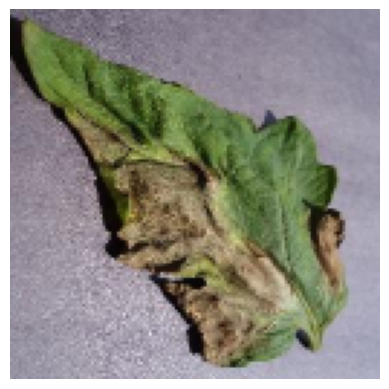

1/1 [==============================] - 0s 23ms/step
class: Tomato___Spider_mites Two-spotted_spider_mite, confidence: 0.999815


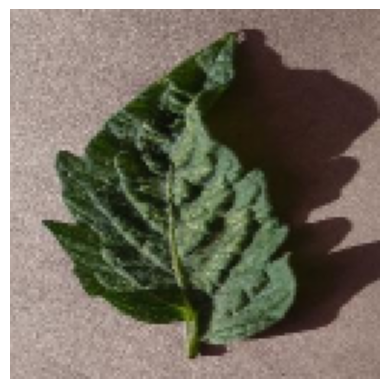

1/1 [==============================] - 0s 22ms/step
class: Pepper,_bell___Bacterial_spot, confidence: 0.999846


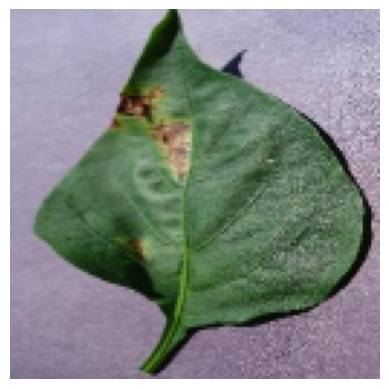

1/1 [==============================] - 0s 23ms/step
class: Raspberry___healthy, confidence: 1.000000


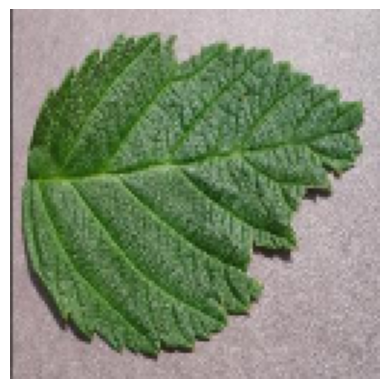

1/1 [==============================] - 0s 22ms/step
class: Apple___healthy, confidence: 0.999996


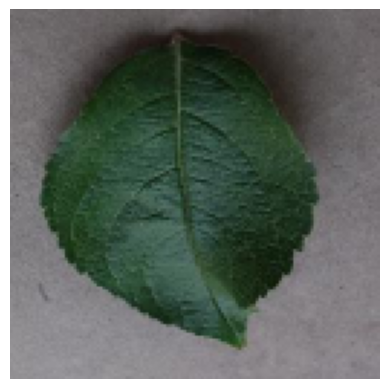

1/1 [==============================] - 0s 24ms/step
class: Tomato___Target_Spot, confidence: 0.880986


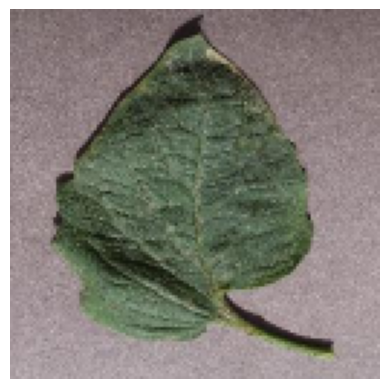

1/1 [==============================] - 0s 23ms/step
class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), confidence: 1.000000


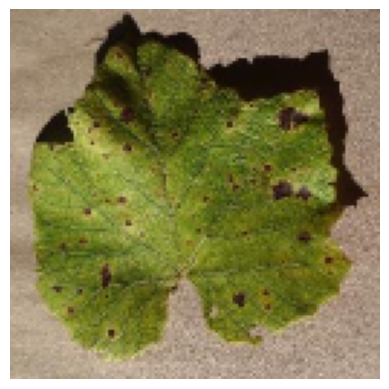

1/1 [==============================] - 0s 22ms/step
class: Apple___Black_rot, confidence: 0.989116


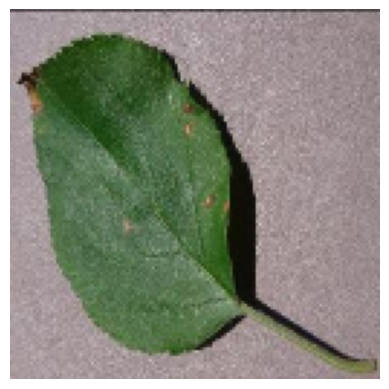

1/1 [==============================] - 0s 22ms/step
class: Tomato___Tomato_mosaic_virus, confidence: 1.000000


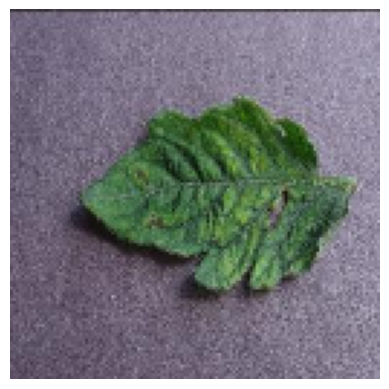

1/1 [==============================] - 0s 22ms/step
class: Tomato___Tomato_mosaic_virus, confidence: 1.000000


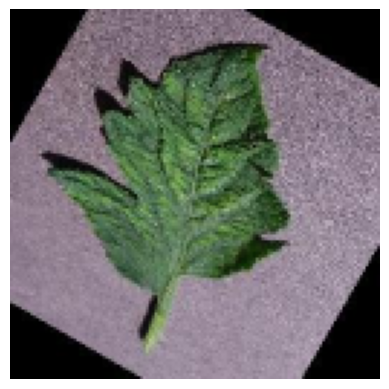

1/1 [==============================] - 0s 22ms/step
class: Orange___Haunglongbing_(Citrus_greening), confidence: 0.953343


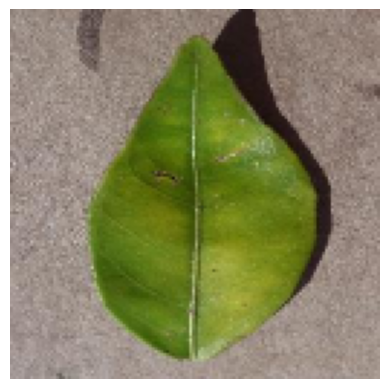

1/1 [==============================] - 0s 24ms/step
class: Strawberry___healthy, confidence: 0.999974


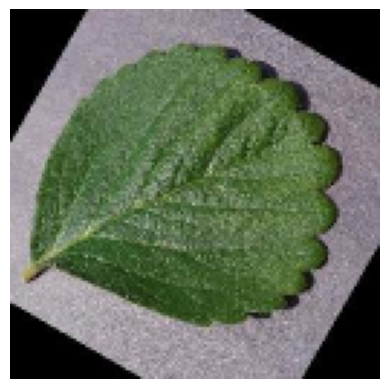

1/1 [==============================] - 0s 23ms/step
class: Cherry_(including_sour)___healthy, confidence: 0.999952


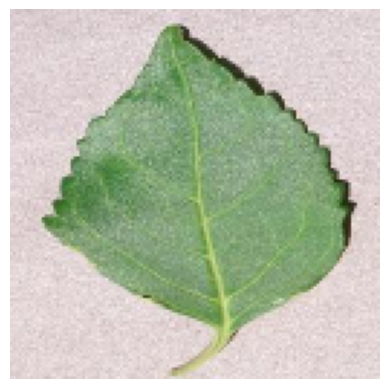

1/1 [==============================] - 0s 22ms/step
class: Peach___Bacterial_spot, confidence: 0.997692


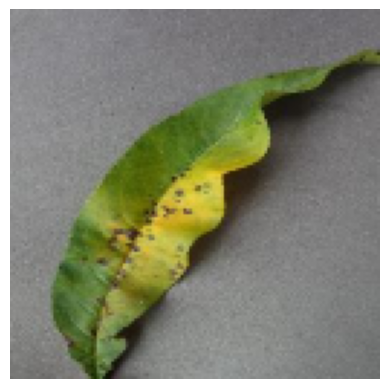

1/1 [==============================] - 0s 22ms/step
class: Blueberry___healthy, confidence: 0.999999


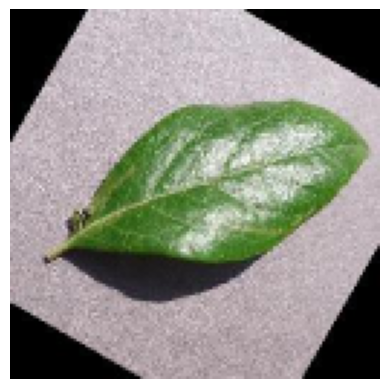

In [23]:
import cv2
Labels = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy'] 
def upload(filename, target_size=(128, 128)):
    img = cv2.imread(os.path.join(val_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0 # normalize pixel values to [0, 1]
    return img
images = random.sample(val_generator.filenames, 16)

for idx, filename in enumerate(images):
    img = upload(filename)
    prediction = pre_result(img)
    print("class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
predictions1 = model.predict(val_generator, steps=len(val_generator))
y = np.argmax(predictions1, axis=1)

print('Classification Report')
cr = classification_report(y_true=val_generator.classes, y_pred=y, target_names=val_generator.class_indices)
print(cr)

evaluates = model.evaluate(val_generator)

print(evaluates)

110/110 [==============================] - 8s 75ms/step
Classification Report
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       100
                                 Apple___Black_rot       0.03      0.03      0.03        99
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        88
                                   Apple___healthy       0.05      0.05      0.05       100
                               Blueberry___healthy       0.01      0.01      0.01        90
          Cherry_(including_sour)___Powdery_mildew       0.03      0.02      0.02        84
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02        91
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.05      0.05      0.05        82
                       Corn_(maize)___Common_rust_       0.01      0.01      0.01        95
 

In [27]:
model.save('my_model.h5')

In [28]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')